In [1]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

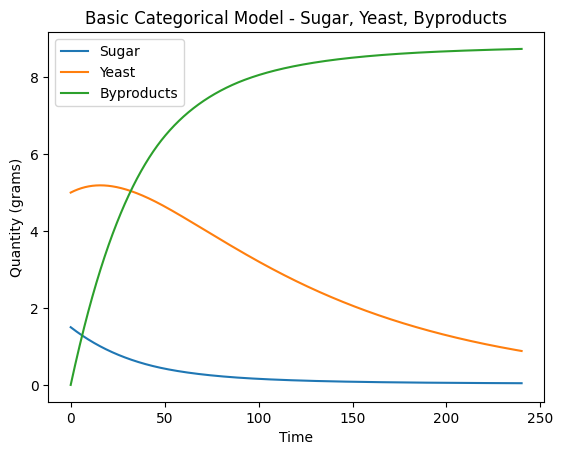

In [9]:
# Building the ODE
def ode(t, y, alpha, beta, gamma, delta):
    """
    Returns the ODE of our simple model.
    Assuming 3 categories; sugar, yeast, and byproducts, including CO2 and ethanol.
    Alpha controls sugar consumption. Beta controls reproduction rate of yeast. Gamma controls rate at which yeast cells die. Delta controls the production of byproducts.
    """
    return np.array([-alpha * y[0] * y[1], beta * y[0] * y[1] - gamma * y[1], delta * y[0] * y[1]])

# Building inputs
t0 = 0
tf = 4 * 60
t_span = (t0, tf)
y0 = np.array([1.5, 5, 0])  # Measured roughly in grams. Assuming 500 grams of flour
t = np.linspace(t0, tf, 1000)

# Parameters
alpha, beta, gamma, delta = 0.005, 0.01, 0.01, 0.03

sol = solve_ivp(ode, t_span, y0, t_eval=t,
                args=(alpha, beta, gamma, delta))

# Plotting the results
plt.plot(sol.t, sol.y[0], label="Sugar")
plt.plot(sol.t, sol.y[1], label="Yeast")
plt.plot(sol.t, sol.y[2], label="Byproducts")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Quantity (grams)")
plt.ylabel("Quantity (grams)")
plt.title("Basic Categorical Model - Sugar, Yeast, Byproducts")
plt.show()